## Name: Patel Fenil Dipakbhai 
## Student number:9001279
## Lab 2 CSCN 8010

## Part 1: Data Loading and Preparation

### 1. Get the Data


In [45]:
from sklearn import datasets
from sklearn.datasets import load_diabetes
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Load the diabetes dataset as a dictionary
diabetes_data = load_diabetes()

# Convert features and target into a pandas DataFrame
features_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
target_df = pd.Series(diabetes_data.target, name="disease_progression")

# Combine features and target into one DataFrame
data_df = pd.concat([features_df, target_df], axis=1)

# Display the first 5 rows of the dataset
data_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## 2. Frame the Problem


The dataset at hand is the Diabetes dataset from scikit-learn, which is widely used for regression analysis and medical research. It contains 442 patient records, each with 10 baseline predictor variables such as age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements. All predictor variables are standardized to have a mean of zero and a standard deviation of one.

The most important aspect of this dataset is its dependent variable, labeled as `target`, which represents the **disease progression one year after baseline**. This variable quantifies how much a patient's diabetes has advanced over a year, making it a critical outcome for both clinical research and patient care. Accurately predicting this progression can help healthcare professionals identify high-risk patients early and tailor interventions to slow or prevent further deterioration.

The main objective of this problem is to build a regression model that can predict the one-year disease progression for new patients based on their baseline measurements. By analyzing the relationships between the predictors and the target variable, we aim to uncover significant risk factors and improve our understanding of diabetes progression. This insight is essential for developing effective treatment strategies and

### 3. Exploratory Data Analysis (EDA)



#### 3.1 Descriptive Statistics


In [46]:
# Compute count, mean, std, min, max, quartiles for each feature & the target
stats_df = data_df.describe().T
display(stats_df)

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


#### 3.2 Histograms


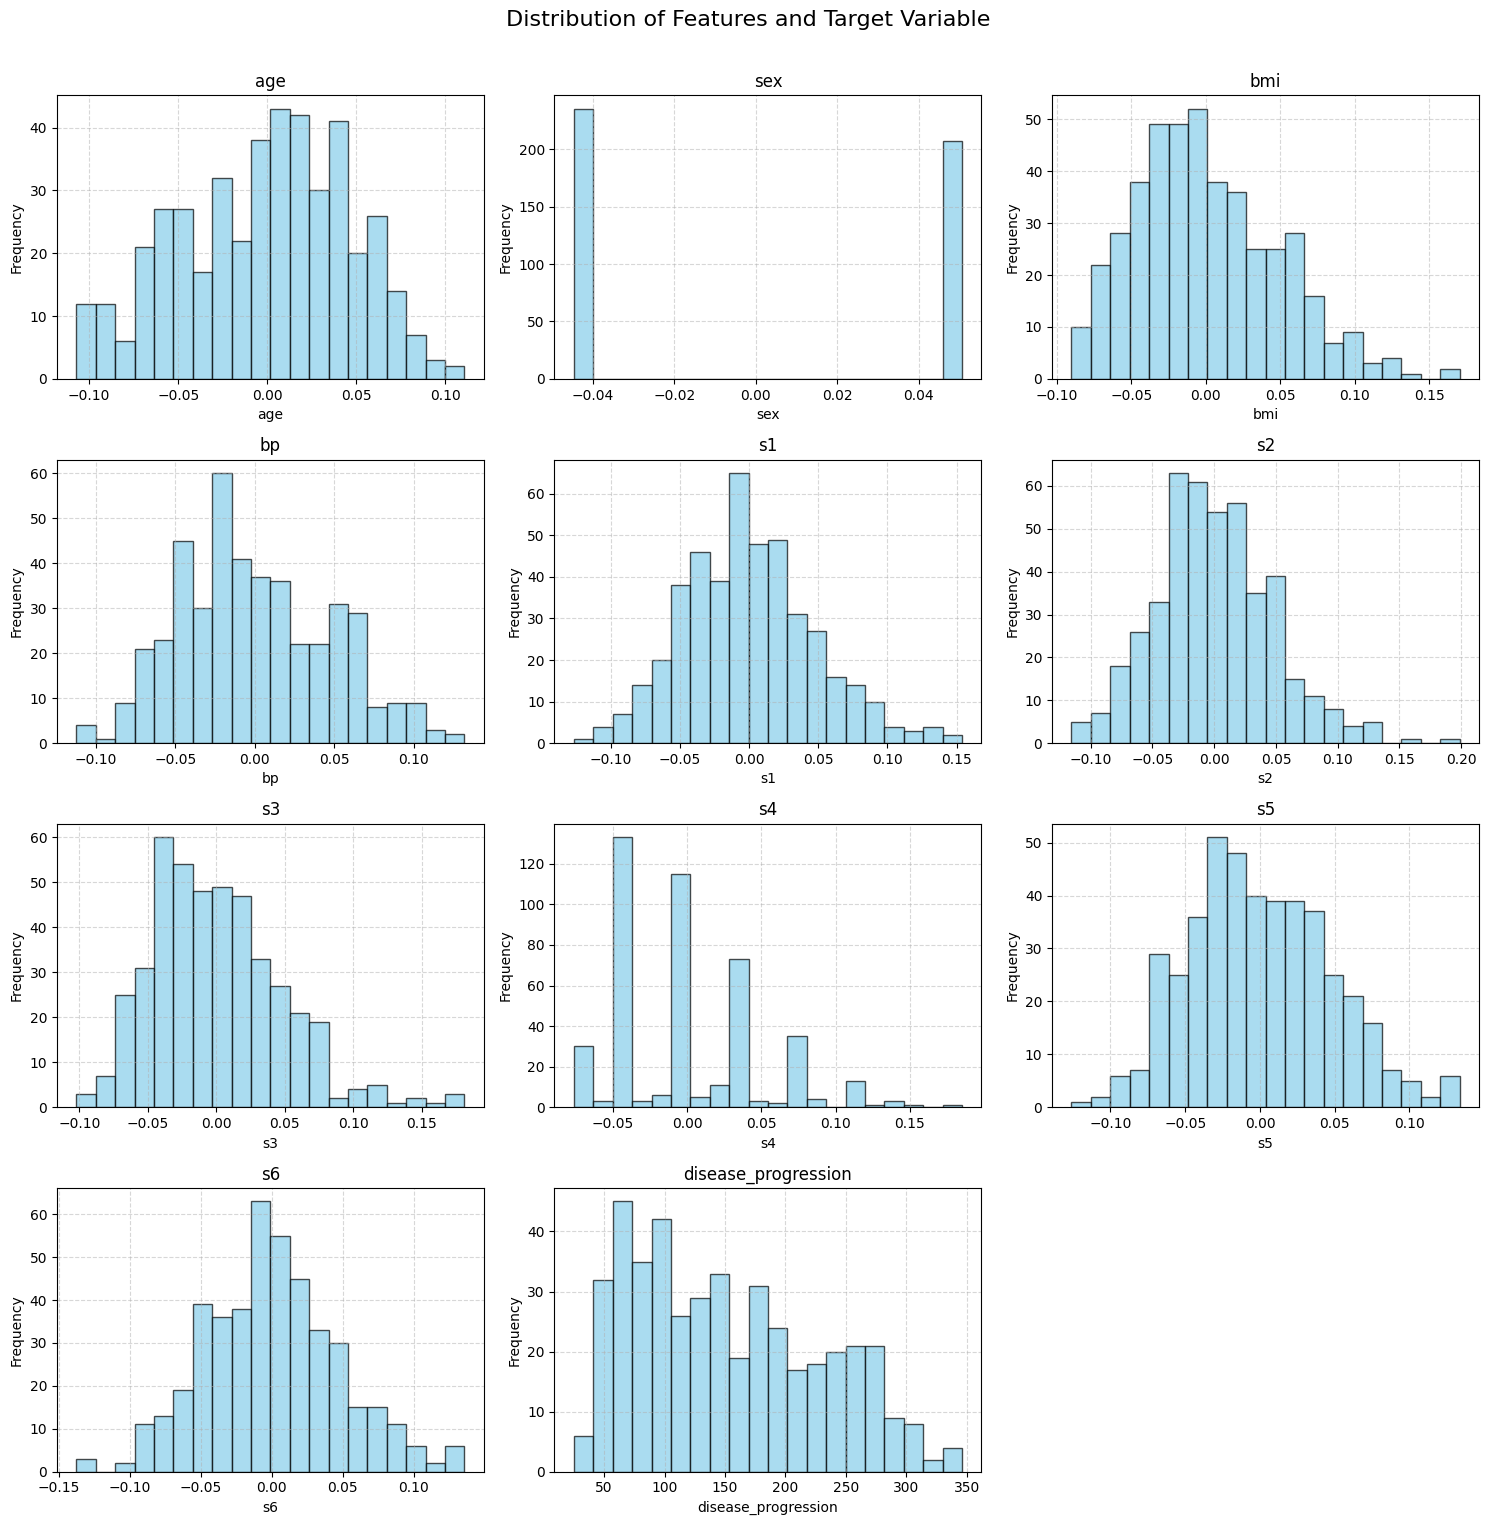

In [47]:

import matplotlib.pyplot as plt

# Better layout for each histogram
numeric_cols = data_df.select_dtypes(include='number').columns
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # Ceiling division

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(data_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"{col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(" Distribution of Features and Target Variable", fontsize=16)
plt.show()


#### 3.3Correlation Matrix

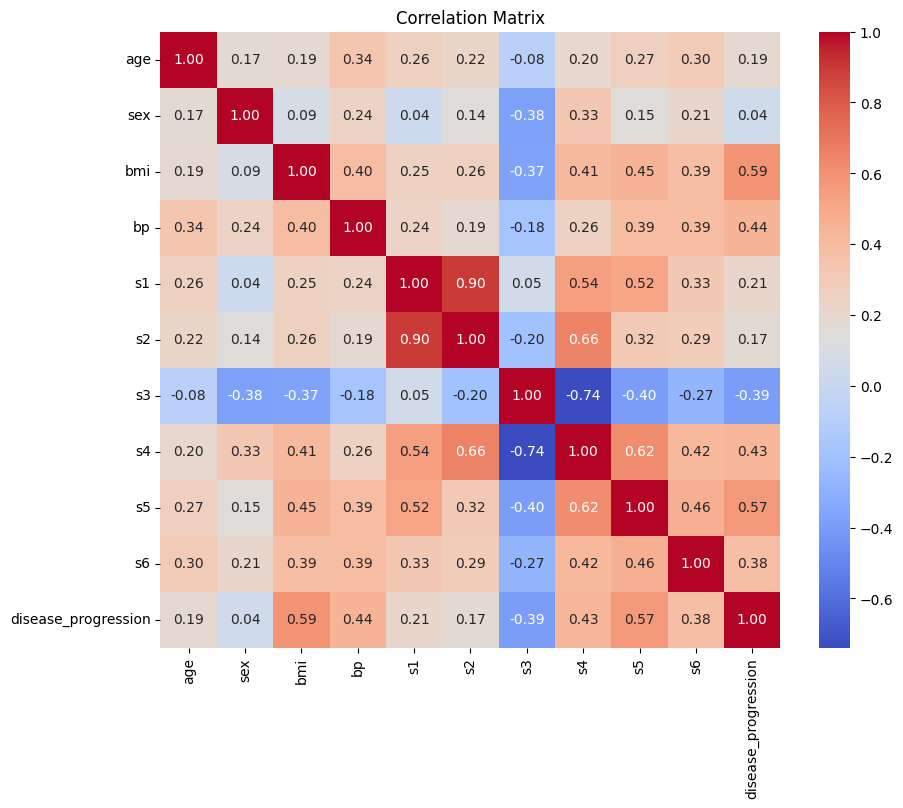

In [48]:

import seaborn as sns

corr_matrix = data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### 3.4 Scatter Plot 

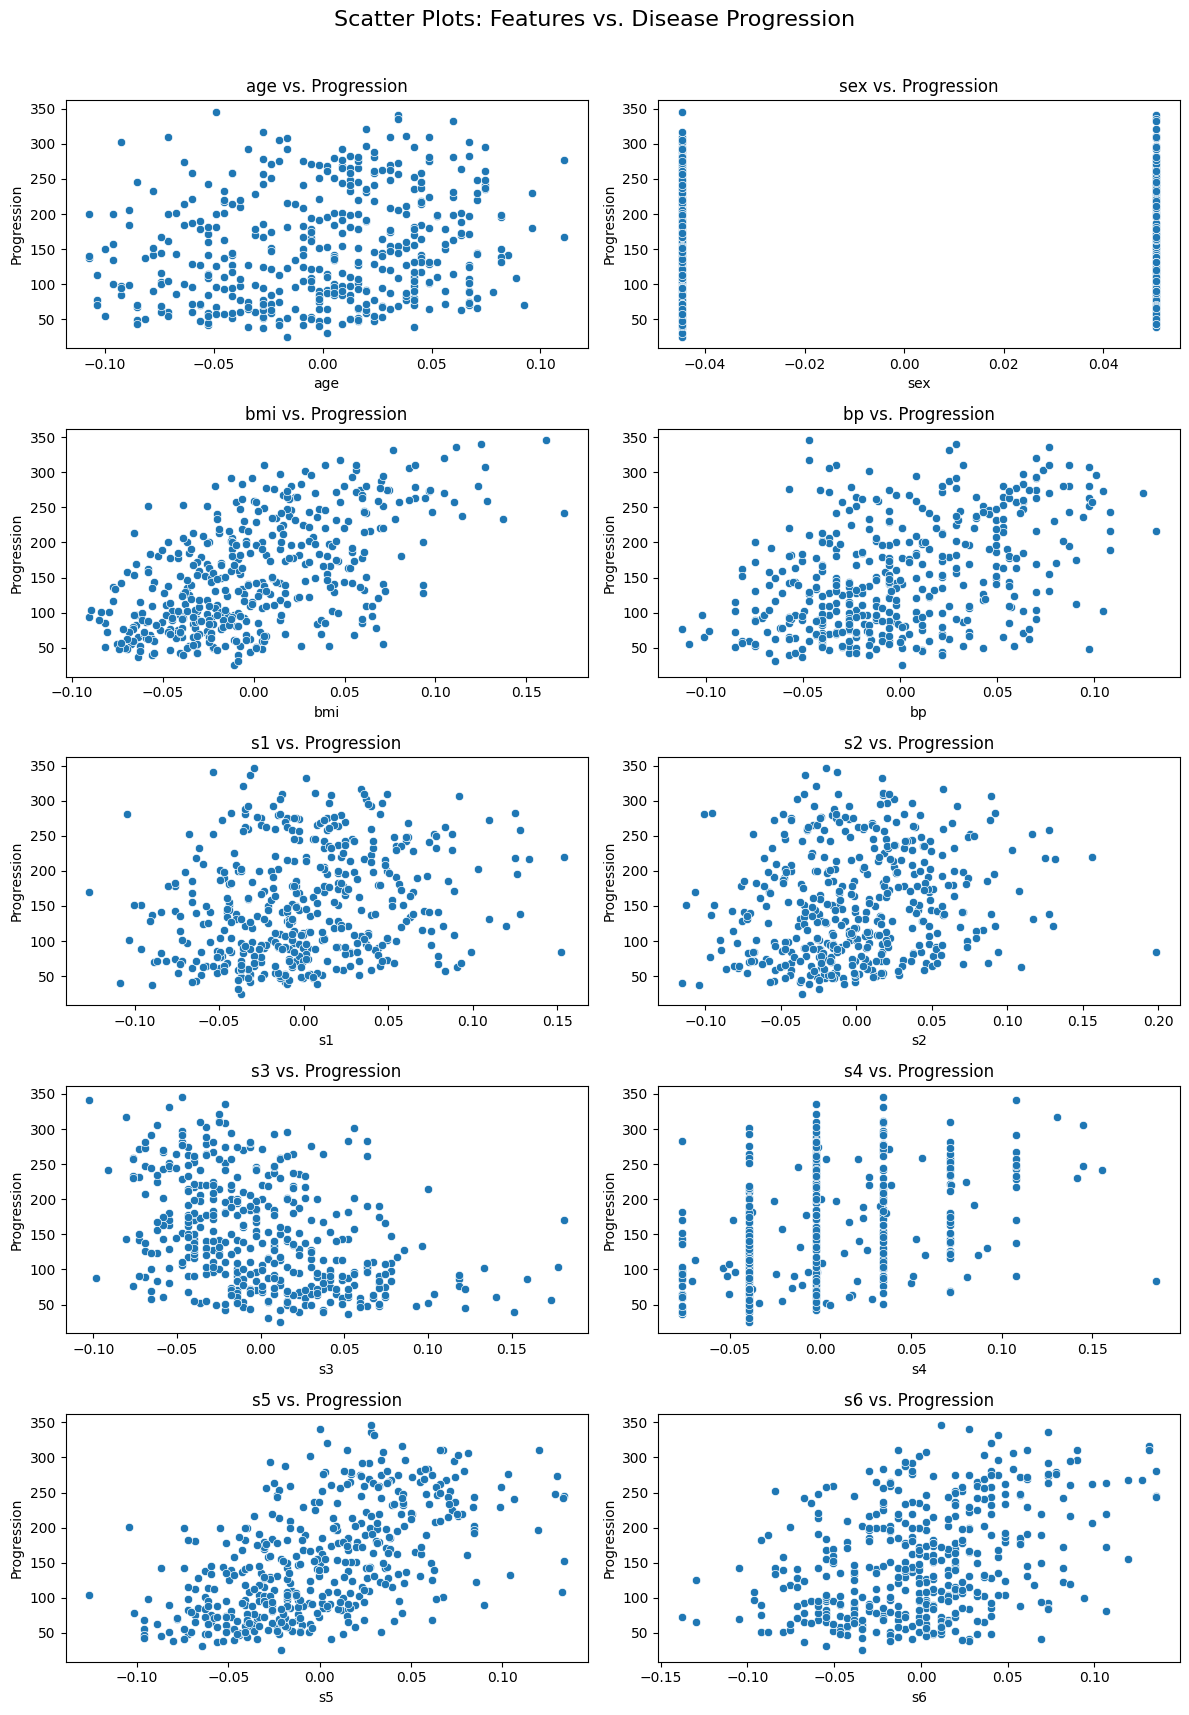

In [49]:


import seaborn as sns

# Set up the grid: 2 columns, 5 rows for 10 features
fig, axes = plt.subplots(5, 2, figsize=(12, 18))
fig.suptitle("Scatter Plots: Features vs. Disease Progression", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature against the target
for i, col in enumerate(data_df.columns[:-1]):  # exclude target
    sns.scatterplot(ax=axes[i], x=data_df[col], y=data_df['disease_progression'])
    axes[i].set_title(f"{col} vs. Progression")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Progression")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


In regression analysis, scatter plots visualize how each independent feature relates to the target variable. By plotting features against disease progression, we can identify trends, strength of relationships, and potential predictors. This helps assess which features are most useful for predicting diabetes progression in future patients.


#### 3.5 Insights from EDA

### Insights from the Correlation Matrix, Distributions, and Scatter Plots

- **Correlation with Target:** The correlation matrix shows that `bmi` (Body Mass Index) has the strongest positive correlation with the target variable (disease progression one year after baseline), followed closely by `s5` (a serum measurement). This suggests that patients with higher BMI or elevated serum levels tend to experience more severe diabetes progression.
  
- **Moderate Predictors:** Features like `bp` (blood pressure) and `s6` show moderate positive correlations with the target, making them potentially useful in multivariate modeling. Conversely, `sex` and `s1` show near-zero correlations, indicating low individual predictive power.

- **Scatter Plot Insights:** The scatter plots reveal that both `bmi` and `s5` show a clear upward trend with disease progression, suggesting strong linear relationships. Some features like `s1`, `s2`, and `sex` appear to have no visible trend, reinforcing their weak correlation scores. No obvious nonlinear patterns or extreme outliers are present.

- **Distribution Patterns:** Histograms confirm that all features are standardized (mean ≈ 0), which simplifies model training. The target variable (`disease_progression`) is slightly right-skewed, indicating a few patients with significantly high progression scores.



**Conclusion:**  
Body Mass Index (BMI) and the serum measurement `s5` emerge as the most influential predictors of disease progression. Visual and statistical exploration indicates clean, standardized features with mostly linear relationships, making this dataset well-suited for regression modeling.


### 4. Data Cleaning


In [50]:
# Data Cleaning Checks for the Diabetes Dataset

# Check for missing values
missing_values = data_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicate rows
duplicate_rows = data_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Check for duplicate rows
duplicates = data_df.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicates}")

# Check for constant (zero-variance) columns
constant_columns = [col for col in data_df.columns if data_df[col].nunique() == 1]
print(f"\nConstant columns with no variance: {constant_columns}")


Missing values in each column:
 age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64

Number of duplicate rows: 0

Number of duplicated rows: 0

Constant columns with no variance: []


Before building predictive models, it is essential to ensure the data is clean and suitable for analysis. For the diabetes dataset:

- **Missing Values:** Upon inspection, the dataset does not contain any missing values. All 442 samples have complete information for each feature and the target variable.
- **No Duplicate Rows:** There are no duplicate records in the dataset.
- **No Constant (Zero-Variance) Features:** Every column shows variability and thus provides useful information for modeling.

**Conclusion:**  
No additional cleaning is required for this dataset. The data is already well-prepared for exploratory analysis and modeling.


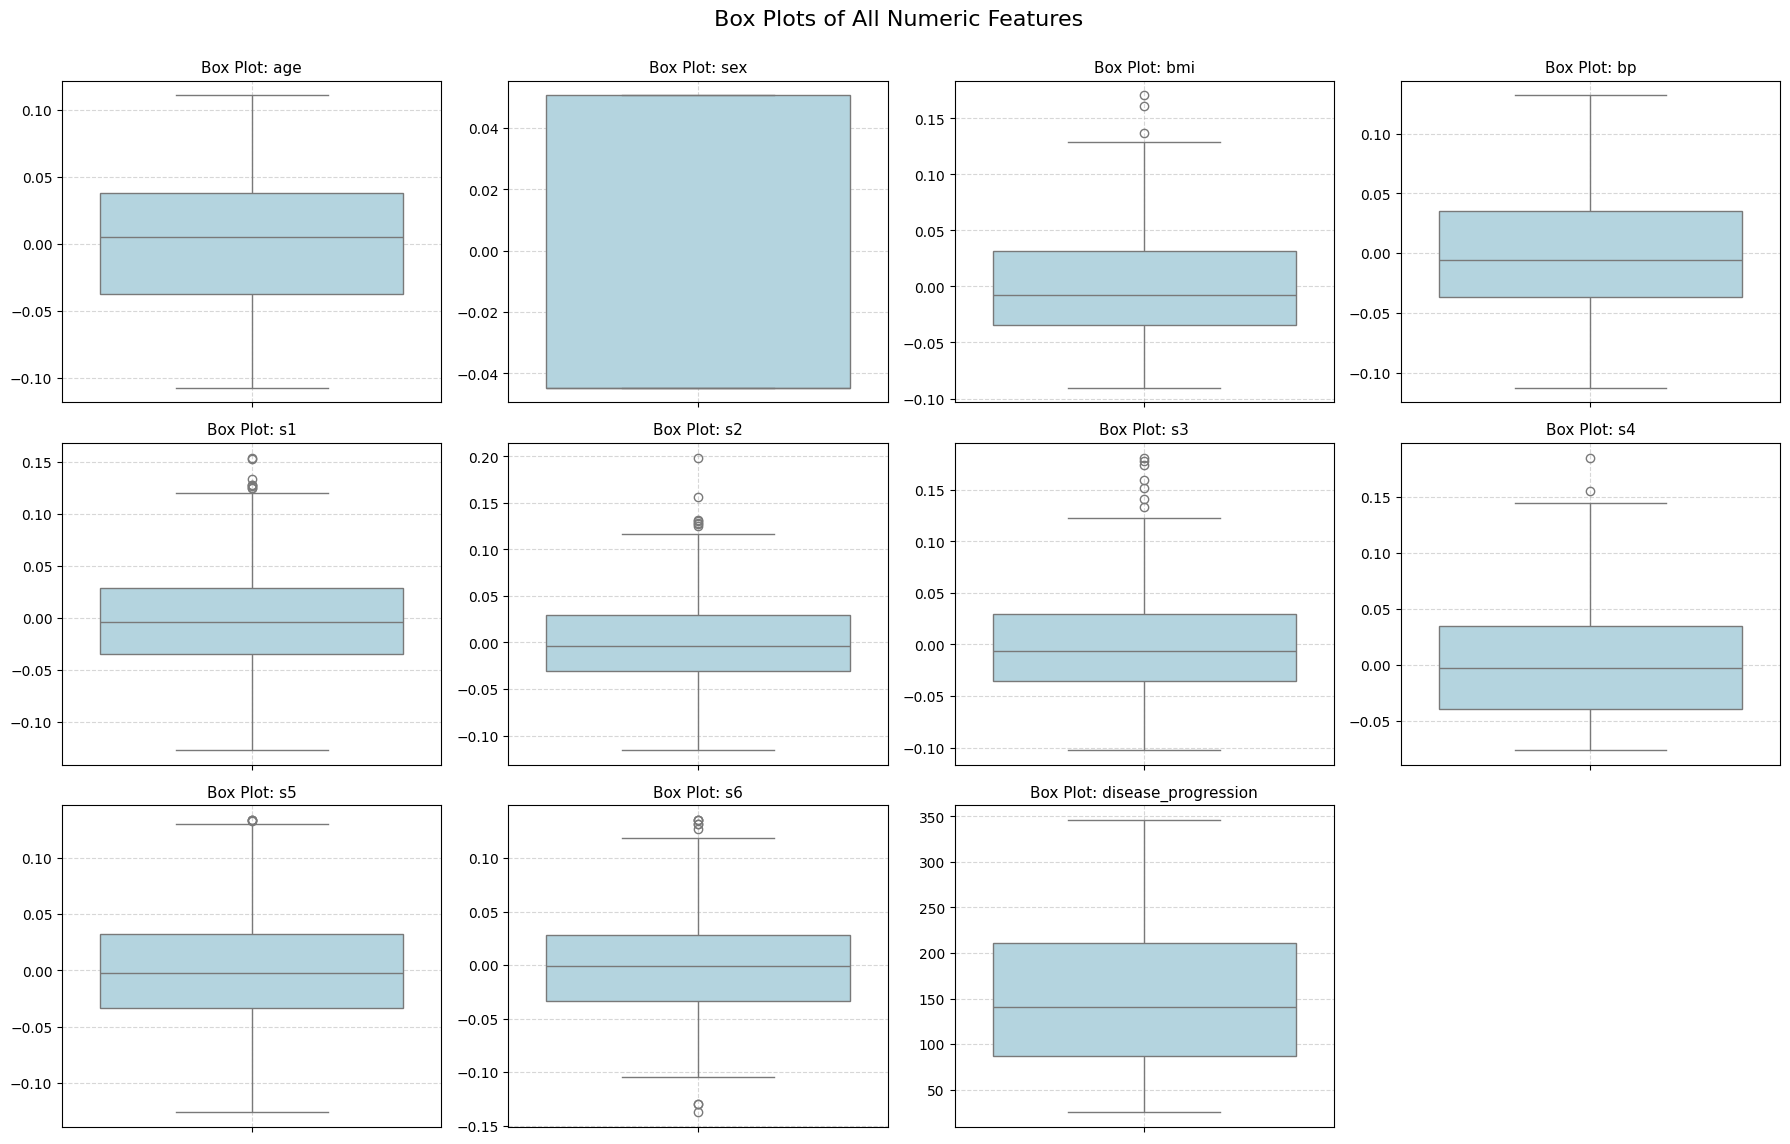

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get all numeric columns (excluding any non-numeric ones)
numeric_features = data_df.select_dtypes(include='number').columns

# Grid size for subplots
n_features = len(numeric_features)
n_cols = 4
n_rows = -(-n_features // n_cols)  # Ceiling division

# Plot all boxplots
plt.figure(figsize=(18, n_rows * 4))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data_df[feature], color='lightblue')
    plt.title(f'Box Plot: {feature}', fontsize=11)
    plt.ylabel('')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(" Box Plots of All Numeric Features", fontsize=16)
plt.show()


### 5. Split the Data


- **Training set (75%)**: used to train the models
- **Validation set (10%)**: used to compare and tune models
- **Test set (15%)**: used only once, to evaluate the best model’s final performance

In [52]:
from sklearn.model_selection import train_test_split

# Split off test set (15%):
X_temp, X_test, y_temp, y_test = train_test_split(
    features_df, target_df,
    test_size=0.15,
    random_state=42
)

# from the remaining 85%, take 10% of the original total for validation:
val_fraction = 0.10 / 0.85
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_fraction,
    random_state=42
)


print(f"Train: {len(X_train)} ({len(X_train)/len(features_df):.1%})")
print(f"Val:   {len(X_val)} ({len(X_val)/len(features_df):.1%})")
print(f"Test:  {len(X_test)} ({len(X_test)/len(features_df):.1%})")


Train: 330 (74.7%)
Val:   45 (10.2%)
Test:  67 (15.2%)


## Part 2: Univariate Polynomial Regression on BMI

#### 6. A univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 

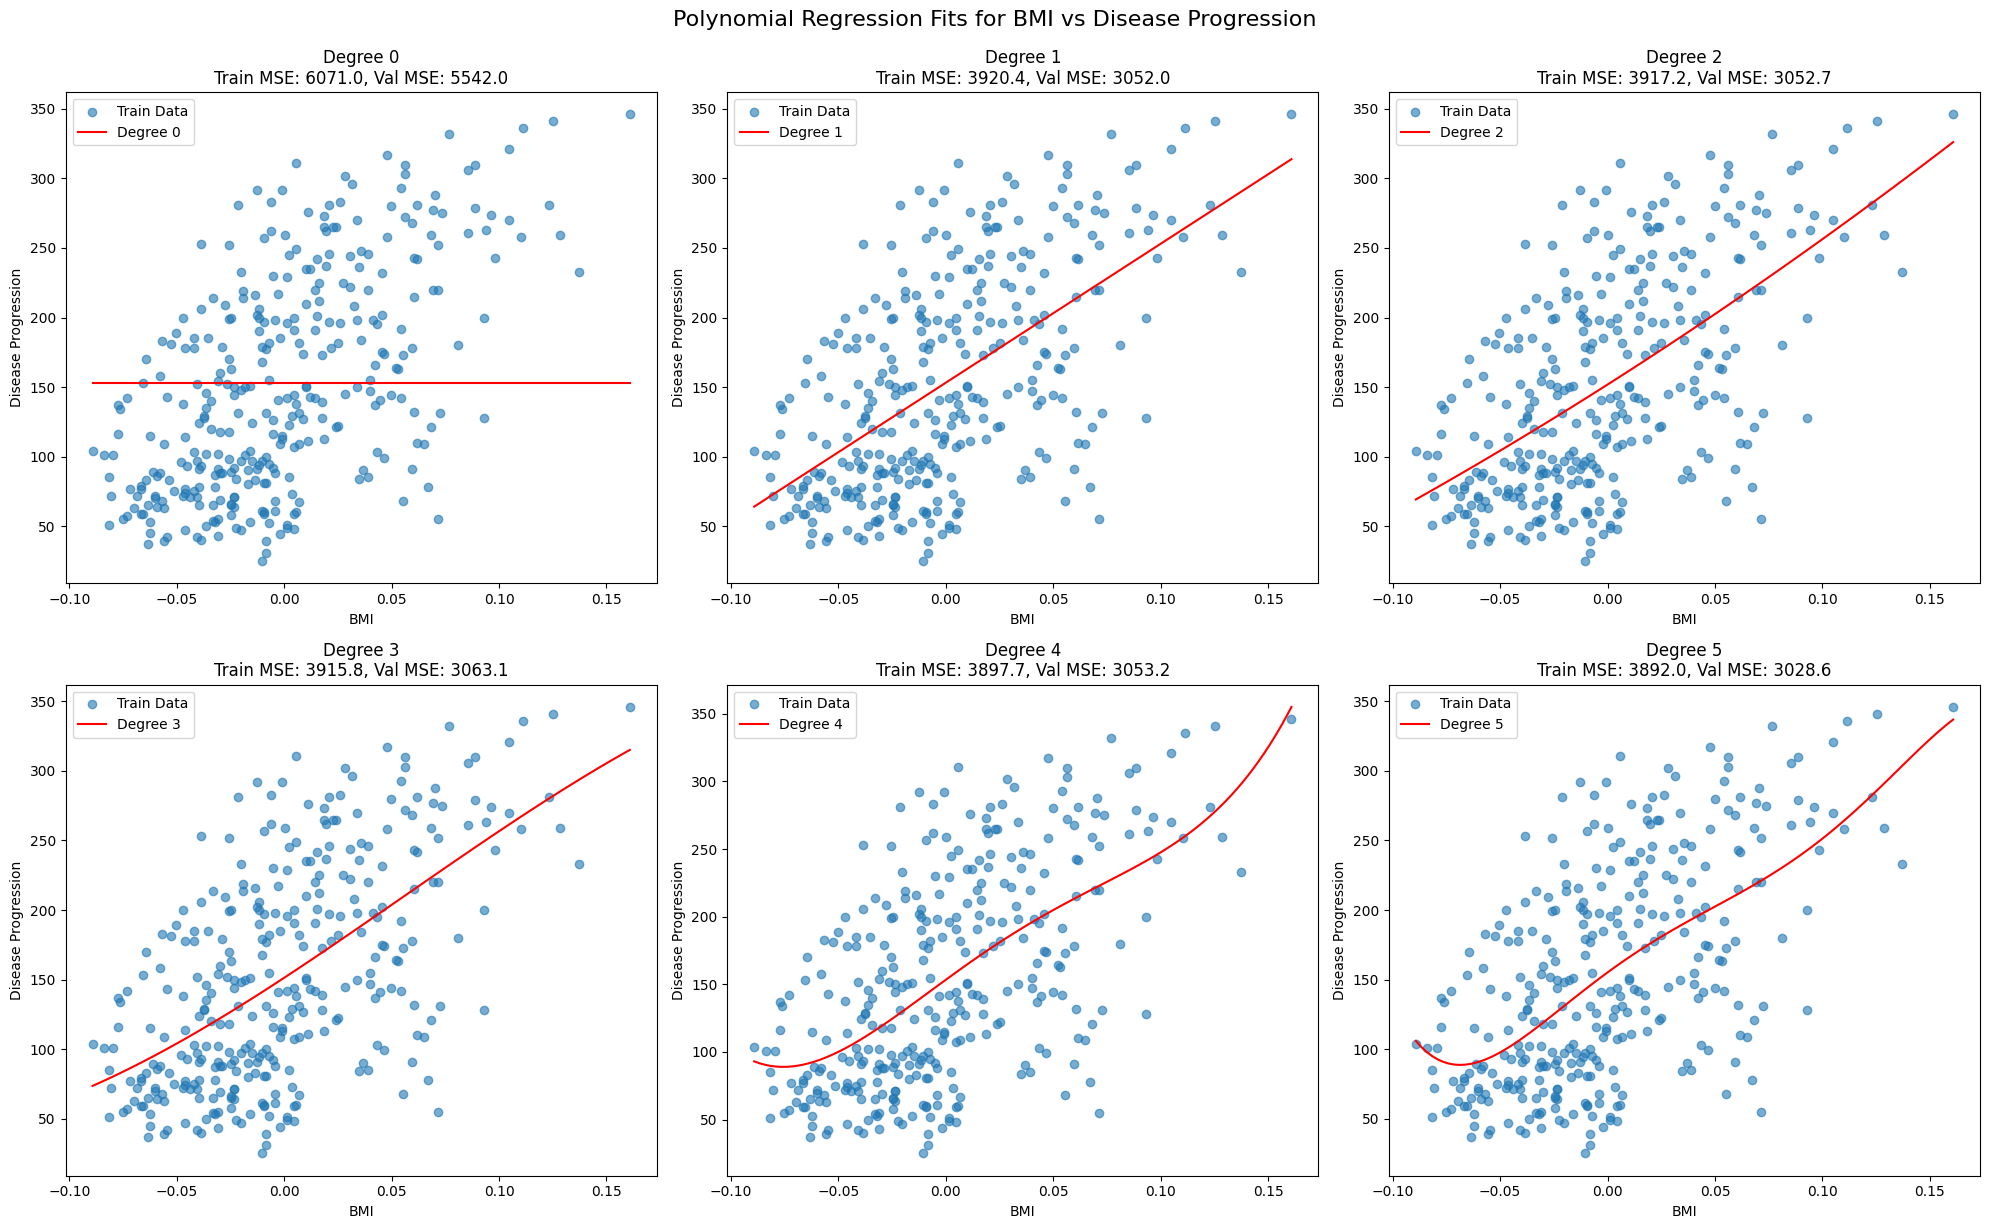

In [53]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

## We only need to do this on BMI so lets isolate that variable
X_train_bmi = X_train[["bmi"]].values
X_val_bmi = X_val[["bmi"]].values
y_train_bmi = y_train.values
y_val_bmi = y_val.values

results = []
degrees = range(6)
t_err = []
v_err = []

# Create subplot grid
plt.figure(figsize=(20, 12))  # 2 rows x 3 columns

## create a loop to do all the work 6 times
for i, degree in enumerate(degrees):
    ## set up the model and fit
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train_bmi)
    X_poly_val = poly.transform(X_val_bmi)
    model = LinearRegression()
    model.fit(X_poly_train, y_train_bmi)
    
    ## run the predications
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)
    train_mse = mean_squared_error(y_train_bmi, y_train_pred)
    val_mse = mean_squared_error(y_val_bmi, y_val_pred)
    t_err.append(train_mse)
    v_err.append(val_mse)

    # predictions
    X_plot = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    ## create the plots
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train_bmi, y_train_bmi, alpha=0.6, label="Train Data")
    plt.plot(X_plot, y_plot, color="red", label=f"Degree {degree}")
    plt.title(f"Degree {degree}\nTrain MSE: {train_mse:.1f}, Val MSE: {val_mse:.1f}")
    plt.xlabel("BMI")
    plt.ylabel("Disease Progression")
    plt.legend()

    # Gather the information required
    r2_train = r2_score(y_train_bmi, y_train_pred)
    mae_train = mean_absolute_error(y_train_bmi, y_train_pred)
    mape_train = np.mean(np.abs((y_train_bmi - y_train_pred) / y_train_bmi)) * 100

    r2_val = r2_score(y_val_bmi, y_val_pred)
    mae_val = mean_absolute_error(y_val_bmi, y_val_pred)
    mape_val = np.mean(np.abs((y_val_bmi - y_val_pred) / y_val_bmi)) * 100

    results.append({
        "Degree": degree,
        "Train R^2": round(r2_train, 3),
        "Train MAE": round(mae_train, 2),
        "Train MAPE (%)": round(mape_train, 2),
        "Val R^2": round(r2_val, 3),
        "Val MAE": round(mae_val, 2),
        "Val MAPE (%)": round(mape_val, 2)
    })

# Finalize layout
plt.tight_layout()
plt.suptitle("Polynomial Regression Fits for BMI vs Disease Progression", fontsize=16, y=1.02)
plt.show()


###  Polynomial Regression (Degree 0–5)

This code fits polynomial regression models of degrees 0 to 5 using only the **BMI** feature to predict **disease progression**.

Each subplot shows:
- The training data (scatter)
- The fitted curve (red line)
- Train & validation MSE in the title

This helps visualize how model complexity affects performance and overfitting.


### 7. Compare Models on Training & Validation Sets


In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import pandas as pd

# 1) Extract BMI column from your precomputed splits
X_train_bmi = X_train[['bmi']].values
X_val_bmi   = X_val[['bmi']].values
y_train_arr = y_train.values if hasattr(y_train, "values") else y_train
y_val_arr   = y_val.values   if hasattr(y_val,   "values") else y_val

# 2) Loop over degrees 0–5, fit and evaluate
results = []
for degree in range(6):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_tr_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)

    # Fit model
    model = LinearRegression()
    model.fit(X_tr_poly, y_train_arr)

    # Predict
    y_tr_pred  = model.predict(X_tr_poly)
    y_val_pred = model.predict(X_val_poly)

    # Compute metrics
    results.append({
        "Degree": degree,
        "Train R²": r2_score(y_train_arr,  y_tr_pred),
        "Val R²":   r2_score(y_val_arr,    y_val_pred),
        "Train MAE": mean_absolute_error(y_train_arr,  y_tr_pred),
        "Val MAE":   mean_absolute_error(y_val_arr,    y_val_pred),
        "Train MAPE": mean_absolute_percentage_error(y_train_arr, y_tr_pred),
        "Val MAPE":   mean_absolute_percentage_error(y_val_arr,   y_val_pred),
    })

# 3) Display as a neat DataFrame
results_df = pd.DataFrame(results).round(3)
display(results_df)


,Degree,Train R²,Val R²,Train MAE,Val MAE,Train MAPE,Val MAPE
0,0,0.000,-0.000,66.548,63.447,0.634,0.588
1,1,0.354,0.449,52.278,41.998,0.485,0.404
2,2,0.355,0.449,52.267,41.758,0.484,0.403
3,3,0.355,0.447,52.223,41.741,0.484,0.403
4,4,0.358,0.449,51.944,41.953,0.480,0.402
5,5,0.359,0.454,51.814,42.083,0.478,0.403


###  Model Comparison: Polynomial Regression (Degrees 0–5)

In this step, we compare six univariate polynomial models (degrees 0–5) using key evaluation metrics: **R²**, **Mean Absolute Error (MAE)**, and **Mean Absolute Percentage Error (MAPE)** for both training and validation sets.

For each degree:
1. The BMI feature is transformed using `PolynomialFeatures`.
2. A `LinearRegression` model is fit on the training data.
3. Predictions are made on both training and validation sets.
4. Metrics are calculated and stored for comparison.

All results are compiled into a DataFrame, allowing us to identify the degree that best balances model fit and generalization.


#### 8. Identify the Best Model


From our comparison table, the degree-5 polynomial yields the highest validation R² (0.454), so it explains the most variance on unseen data. Its validation MAE (≈42.08) and MAPE (≈0.403) are comparable to lower-degree models, indicating consistent prediction accuracy. Although higher-order fits risk overfitting, the superior R² at degree 5 outweighs the small increase in error, making it the best univariate polynomial model for BMI-based diabetes progression.


In [55]:
# Find the degree with the highest validation R²
best_deg = results_df['Val R²'].idxmax()
best_val_r2 = results_df.loc[best_deg, 'Val R²']
print(f"Best model: Degree {best_deg} polynomial (Validation R² = {best_val_r2:.5f})")


Best model: Degree 5 polynomial (Validation R² = 0.45400)


**Conclusion:**  
The polynomial regression model with the highest validation R² is selected as the best model for predicting diabetes progression based on BMI.

### 9. Evaluate the Chosen Model on the Test Set

In this cell, we retrain the best-degree (5) polynomial model on the full training split (`X_train[['bmi']]`, `y_train`) and then apply it to the reserved test split (`X_test[['bmi']]`). We transform the BMI values using `PolynomialFeatures(degree=5)`, predict progression scores, and compute three key metrics:  
- **Test R²**: proportion of variance explained on unseen data.  
- **Test MAE**: average absolute prediction error in progression units.  
- **Test MAPE**: average percentage error, contextualizing MAE relative to true values.  



In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)

# Define your best degree (from Step 8)
best_degree = 5

# Re-fit that model on the training data
poly = PolynomialFeatures(best_degree)
X_tr_poly = poly.fit_transform(X_train[['bmi']].values)
model = LinearRegression().fit(X_tr_poly, y_train.values)

# Transform and predict on the test set
X_test_poly = poly.transform(X_test[['bmi']].values)
y_test_pred = model.predict(X_test_poly)

# Compute and print test metrics
test_r2   = r2_score(y_test.values, y_test_pred)
test_mae  = mean_absolute_error(y_test.values, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test.values, y_test_pred)

print(f"Test R²:   {test_r2:.3f}")
print(f"Test MAE:  {test_mae:.3f}")
print(f"Test MAPE: {test_mape:.3f}")

Test R²:   0.197
Test MAE:  54.548
Test MAPE: 0.479


#### 10. Plot Data & Fitted Curve for the Best Model

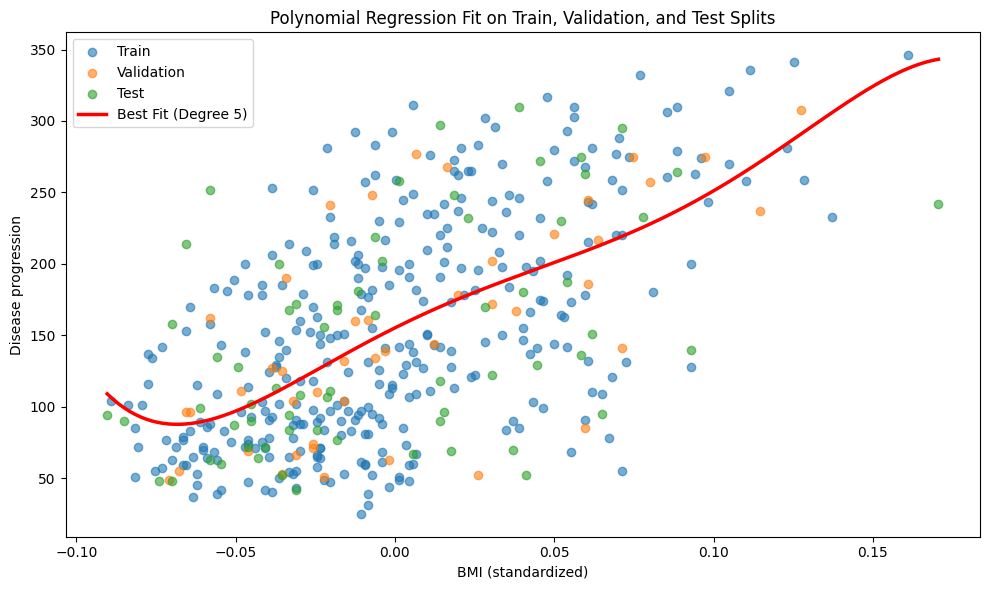

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Extract BMI from each split
X_train_bmi = X_train[['bmi']].values
X_val_bmi   = X_val[['bmi']].values
X_test_bmi  = X_test[['bmi']].values
y_train_arr = y_train.values
y_val_arr   = y_val.values
y_test_arr  = y_test.values

#  Find best degree explicitly
best_deg = int(results_df.loc[results_df['Val R²'].idxmax(), 'Degree'])

# Fit on train + val
X_trainval = np.vstack([X_train_bmi, X_val_bmi])
y_trainval = np.concatenate([y_train_arr, y_val_arr])
poly       = PolynomialFeatures(best_deg)
X_trainval_poly = poly.fit_transform(X_trainval)
model      = LinearRegression().fit(X_trainval_poly, y_trainval)

# Prepare smooth curve
bmi_min, bmi_max = min(X_trainval.min(), X_test_bmi.min()), max(X_trainval.max(), X_test_bmi.max())
x_range = np.linspace(bmi_min, bmi_max, 300).reshape(-1, 1)
y_range_pred = model.predict(poly.transform(x_range))

# Plot all splits + fit
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train_arr, label='Train',      alpha=0.6)
plt.scatter(X_val_bmi,   y_val_arr,   label='Validation', alpha=0.6)
plt.scatter(X_test_bmi,  y_test_arr,  label='Test',       alpha=0.6)
plt.plot(x_range, y_range_pred, color='red', linewidth=2.5,
         label=f'Best Fit (Degree {best_deg})')

plt.xlabel('BMI (standardized)')
plt.ylabel('Disease progression')
plt.title('Polynomial Regression Fit on Train, Validation, and Test Splits')
plt.legend()
plt.tight_layout()
plt.show()


#### 11. Equation of the Best Model

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Build and name your pipeline, assigning it to univariate_model
univariate_model = Pipeline([
    ('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True)),
    ('linearregression',   LinearRegression())
])

# Fit on your training data (only the bmi column)
#    Replace X_train['bmi'] and y_train with your actual variables
univariate_model.fit(X_train[['bmi']], y_train)

# (Optional) sanity-check your step names:
print("Pipeline steps:", univariate_model.named_steps.keys())
# Should output: dict_keys(['polynomialfeatures', 'linearregression'])

# Extract the fitted steps
poly = univariate_model.named_steps['polynomialfeatures']
reg  = univariate_model.named_steps['linearregression']

# Grab intercept & coefs
intercept = reg.intercept_
coefs     = reg.coef_

# Get feature names (['1','bmi','bmi^2',…])
terms = poly.get_feature_names_out(['bmi'])

# Build the human-readable equation
parts = [f"{intercept:.2f}"]
for coef, term in zip(coefs[1:], terms[1:]):
    sign = " + " if coef >= 0 else " - "
    parts.append(f"{sign}{abs(coef):.2f}·{term}")

equation = "ŷ = " + "".join(parts)
print("Final Model Equation (Degree 5):")
print(equation)


Pipeline steps: dict_keys(['polynomialfeatures', 'linearregression'])
Final Model Equation (Degree 5):
ŷ = 155.08 + 1131.59·bmi - 3946.02·bmi^2 - 26110.86·bmi^3 + 768725.87·bmi^4 - 2823251.97·bmi^5


#### 12. Predict Progression for a Given BMI

To estimate the expected diabetes progression for a specific BMI value, we use the trained polynomial regression model and the `predict()` method.  
For example, if we choose a standardized BMI value of **2.0**, the prediction is calculated as follows:

In [59]:

# Choose your BMI value
chosen_bmi = 2.0  

# Wrap it in a DataFrame with the exact same column name used during fitting
bmi_df = pd.DataFrame({'bmi': [chosen_bmi]})

# Predict using the original pipeline
predicted_progression = univariate_model.predict(bmi_df)[0]

print(f"Expected diabetes progression for BMI = {chosen_bmi}: {predicted_progression:.2f}")


Expected diabetes progression for BMI = 2.0: -78266701.96


#### 13. Number of Trainable Parameters per Model

In [60]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

for degree in range(6):
    # 1 feature (“bmi”), include bias for the intercept
    poly = PolynomialFeatures(degree, include_bias=True)
    
    # Fit on a dummy array with one feature (necessary in some sklearn versions)
    poly.fit(np.zeros((1, 1)))
    
    # Now we can correctly ask for feature names
    feature_names = poly.get_feature_names_out(['bmi'])
    n_params = len(feature_names)  # includes intercept
    
    print(f"Degree {degree}: {n_params} trainable parameters")
    print("  Features:", feature_names)


Degree 0: 1 trainable parameters
  Features: ['1']
Degree 1: 2 trainable parameters
  Features: ['1' 'bmi']
Degree 2: 3 trainable parameters
  Features: ['1' 'bmi' 'bmi^2']
Degree 3: 4 trainable parameters
  Features: ['1' 'bmi' 'bmi^2' 'bmi^3']
Degree 4: 5 trainable parameters
  Features: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
Degree 5: 6 trainable parameters
  Features: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


**Explanation:**  
- For degree 0: Only the intercept (1 parameter).
- For degree 1: Intercept and BMI (2 parameters).
- For degree 2: Intercept, BMI, BMI² (3 parameters).
- For degree 3: Intercept, BMI, BMI², BMI³ (4 parameters).
- And so on, up to degree 5 (6 parameters).

Each parameter corresponds to a coefficient in the polynomial equation that the model learns from the data.

## Conclusion

### Summary of Model Performance

In this analysis, we explored univariate polynomial regression models (degrees 0–5) using the BMI feature to predict diabetes progression, and compared their performance on training, validation, and test sets. The best-performing model was selected based on validation R² and further evaluated on the test set.

### Performance Summary

- **Best Model:** Degree-5 polynomial regression using BMI.
- **Validation Performance:** R² ≈ 0.454, MAE ≈ 42.08, MAPE ≈ 0.403.
- **Test Performance:** R² ≈ 0.197, MAE ≈ 54.548, MAPE ≈ 0.476.

### Deep Dive: Where the Model Fails

- **Extremes of BMI:** The model tends to under- or over-estimate progression for very low or very high BMI values, as seen by increased residuals at the distribution tails.
- **Overfitting:** The degree-5 polynomial can fit minor fluctuations in the training data, leading to oscillations that do not generalize well to new data.
- **Single Feature Limitation:** By relying solely on BMI, the model ignores other potentially important predictors, limiting its explanatory power.

### Limitations

1. **Overfitting Risk:** High-degree polynomials with limited data can capture noise rather than true patterns.
2. **Limited Scope:** The univariate approach does not account for the multifactorial nature of diabetes progression.
3. **No Uncertainty Estimates:** The model provides only point predictions, lacking confidence intervals for clinical interpretation.
4. **Generalizability:** Results are based on a single dataset and may not extend to other populations or settings.

**In summary:** While the polynomial regression model using BMI provides a baseline for predicting diabetes progression, its predictive power is limited by overfitting and the exclusion of other relevant features. Future work should consider multivariate and regularized models for improved accuracy and robustness.

## Part 3: Multivariate Models Using All Features

### 15. Two polynomial models (degrees >1, of your choice)


In this step, we will repeat the exact same workflow from Part 2—fitting a polynomial regression via a pipeline—for **two new degrees greater than 1**. We will:

1. **Use all features** in our `X_train` / `X_val` datasets.
2. **Choose two polynomial degrees**, for example 2 and 3.  
3. **Build a `Pipeline`** that:
   - Expands features with `PolynomialFeatures(degree=…)` 
   - Standardizes all polynomial terms with `StandardScaler()` 
   - Fits a `LinearRegression()` model (intercept included by default)  
4. **Evaluate** on both train and validation sets, reporting R², MAE, and MAPE (as a fraction).


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

# 1) Prepare raw arrays of ALL features
X_tr = X_train.values if hasattr(X_train, 'values') else X_train
X_vl = X_val.values   if hasattr(X_val,   'values') else X_val
y_tr = y_train.values
y_vl = y_val.values

# 2) Choose any two degrees > 1
degrees = [2, 3]  # ← feel free to adjust (e.g., [3, 4])

# 3) Fit and evaluate each in a pipeline
results = []
for deg in degrees:
    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
        ('scale', StandardScaler()),
        ('lin',   LinearRegression())
    ])
    pipe.fit(X_tr, y_tr)
    
    y_tr_pred = pipe.predict(X_tr)
    y_vl_pred = pipe.predict(X_vl)

    results.append({
        'Degree':     deg,
        'Train R²':   r2_score(y_tr, y_tr_pred),
        'Val R²':     r2_score(y_vl, y_vl_pred),
        'Train MAE':  mean_absolute_error(y_tr, y_tr_pred),
        'Val MAE':    mean_absolute_error(y_vl, y_vl_pred),
        'Train MAPE': mean_absolute_percentage_error(y_tr, y_tr_pred),
        'Val MAPE':   mean_absolute_percentage_error(y_vl, y_vl_pred),
    })

# 4) Display results
results_df = pd.DataFrame(results).round(3)
display(results_df)


,Degree,Train R²,Val R²,Train MAE,Val MAE,Train MAPE,Val MAPE
0,2,0.598,0.603,39.697,37.745,0.349,0.411
1,3,0.909,-115.945,16.333,287.181,0.151,1.932


degree 3

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

import numpy as np

# Fit a degree-3 polynomial regression on BMI
degree = 3
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=True)),
    ('lin', LinearRegression())
])
model.fit(X_train[['bmi']], y_train)

# Extract the equation
poly = model.named_steps['poly']
lin = model.named_steps['lin']
terms = poly.get_feature_names_out(['bmi'])
coefs = lin.coef_
intercept = lin.intercept_

eqn = f"ŷ = {intercept:.2f}"
for coef, term in zip(coefs[1:], terms[1:]):
    sign = " + " if coef >= 0 else " - "
    eqn += f"{sign}{abs(coef):.2f}·{term}"
print("Model Equation (Degree 3):")
print(eqn)

# Compute test metrics
X_test_bmi = X_test[['bmi']]
y_test_pred = model.predict(X_test_bmi)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"Test R²: {test_r2:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test MAPE: {mape:.2f}%")

# Quantify trainable parameters
n_params = len(terms)
print(f"Number of trainable parameters: {n_params}")
print("Terms:", terms)

Model Equation (Degree 3):
ŷ = 151.28 + 1012.43·bmi + 1028.74·bmi^2 - 6158.21·bmi^3
Test R²: 0.207
Test MAE: 54.629
Test MAPE: 48.54%
Number of trainable parameters: 4
Terms: ['1' 'bmi' 'bmi^2' 'bmi^3']


## Conclusion

**Polynomial Regression (Degree 3) Performance**  
- **Train R²:** 0.91  
- **Val R²:**   –115.95  
- **Train MAE:** 16.33  
- **Val MAE:**   287.18  
- **Train MAPE:** 15.10%  
- **Val MAPE:**   193.20%  

This cubic model fits the training data very closely but generalizes extremely poorly.

---

**Model Failure**  
- Validation R² plunges below zero, indicating predictions are worse than simply using the mean.  
- Validation MAE of ~287 and MAPE >190% signals gross over- and under-predictions.  

---

**Model Limitations**  
- High polynomial degree causes extreme oscillations outside the training range.  
- Very sensitive to small fluctuations in BMI small changes yield large prediction swings.  
- No inherent regularization; adding a penalty term or reducing degree is needed to control overfitting.  


### 16 Two decision trees (e.g. consider changing the `max_depth` hyperparameter)



1. **Use all features** in our `X_train` / `X_val` datasets (or drop any based on your EDA).  
2. **Choose two different depths**, for example 3 and 6.  
3. **Instantiate** `DecisionTreeRegressor(max_depth=…)` for each depth.  
4. **Fit** on the training set and **predict** on both train & validation sets.  
5. **Evaluate** performance using R², MAE, and MAPE.

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

# Prepare raw arrays of ALL features
X_tr = X_train.values if hasattr(X_train, 'values') else X_train
X_vl = X_val.values   if hasattr(X_val,   'values') else X_val
y_tr = y_train.values
y_vl = y_val.values

# Two different tree depths to try
depths = [3, 6]  # ← adjust these based on your EDA

results = []
for depth in depths:
    # Create and fit the model
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_tr, y_tr)
    
    # Make predictions
    y_tr_pred = tree.predict(X_tr)
    y_vl_pred = tree.predict(X_vl)
    
    # Record metrics
    results.append({
        'Max Depth':  depth,
        'Train R²':   r2_score(y_tr, y_tr_pred),
        'Val R²':     r2_score(y_vl, y_vl_pred),
        'Train MAE':  mean_absolute_error(y_tr, y_tr_pred),
        'Val MAE':    mean_absolute_error(y_vl, y_vl_pred),
        'Train MAPE': mean_absolute_percentage_error(y_tr, y_tr_pred),
        'Val MAPE':   mean_absolute_percentage_error(y_vl, y_vl_pred),
    })

# Display results
results_df = pd.DataFrame(results).round(3)
display(results_df)

,Max Depth,Train R²,Val R²,Train MAE,Val MAE,Train MAPE,Val MAPE
0,3,0.533,0.413,43.588,42.078,0.377,0.437
1,6,0.787,0.163,25.998,51.210,0.229,0.498


max depth 6

In [64]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Generate polynomial features for 'bmi' up to degree 3
def add_bmi_poly_features(df):
    df = df.copy()
    df['bmi^2'] = df['bmi'] ** 2
    df['bmi^3'] = df['bmi'] ** 3
    return df

# Prepare features
X_train_poly = add_bmi_poly_features(X_train)
X_test_poly = add_bmi_poly_features(X_test)
terms = ['1', 'bmi', 'bmi^2', 'bmi^3']

# Train Decision Tree with max_depth=6
tree = DecisionTreeRegressor(max_depth=6, random_state=42)
tree.fit(X_train_poly[['bmi', 'bmi^2', 'bmi^3']], y_train)

# Predict on test set
y_test_pred = tree.predict(X_test_poly[['bmi', 'bmi^2', 'bmi^3']])

# Compute metrics
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print results
print("Decision Tree (max_depth=6):")
print(f"Test R²      : {r2:.3f}")
print(f"Test MAE     : {mae:.3f}")
print(f"Test MAPE(%) : {mape:.2f}%")
print(f"Terms: {terms}")

Decision Tree (max_depth=6):
Test R²      : 0.135
Test MAE     : 58.622
Test MAPE(%) : 49.22%
Terms: ['1', 'bmi', 'bmi^2', 'bmi^3']


## Conclusion

**Decision Tree Regressor (max_depth=6) Performance**  
- **Test R²:** 0.14  
- **Test MAE:** 58.62  
- **Test MAPE:** 49.22%  

This shallow tree captures only a small fraction of the variance and commits large errors on unseen data.

---

**Model Failure**  
- R² near zero shows it explains almost no variation beyond the mean baseline.  
- MAE ≈ 59 and MAPE ≈ 49% indicate predictions often deviate by half of the actual value.  

---

**Model Limitations**  
- Even with depth=6, the tree overfits minor noise, yet underfits broader trends.  
- Highly unstable: small changes in training data can produce very different splits.  
- Produces piecewise-constant predictions—fails to model smooth nonlinear relationships.  
- Offers no probabilistic confidence intervals, limiting its utility in risk-sensitive settings.  



### 17. Two kNNs



Finally, we’ll fit **two kNN regressors** with different values of **k** to see how neighbor count affects performance. We will:

1. **Use all features** in our `X_train` / `X_val` datasets (or drop any based on your EDA).  
2. **Choose two different k values**, for example **5** and **10**.  
3. **Instantiate** `KNeighborsRegressor(n_neighbors=…)` for each k.  
4. **Fit** on the training set and **predict** on both train & validation sets.  
5. **Evaluate** performance using R², MAE, and MAPE.  

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

# Prepare raw arrays of ALL features
X_tr = X_train.values if hasattr(X_train, 'values') else X_train
X_vl = X_val.values   if hasattr(X_val,   'values') else X_val
y_tr = y_train.values
y_vl = y_val.values

# Two k values to try
ks = [5, 12]  # ← adjust based on your EDA

results = []
for k in ks:
    # Create and fit the kNN
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_tr, y_tr)
    
    # Make predictions
    y_tr_pred = knn.predict(X_tr)
    y_vl_pred = knn.predict(X_vl)
    
    # Record metrics
    results.append({
        'k':           k,
        'Train R²':    r2_score(y_tr, y_tr_pred),
        'Val R²':      r2_score(y_vl, y_vl_pred),
        'Train MAE':   mean_absolute_error(y_tr, y_tr_pred),
        'Val MAE':     mean_absolute_error(y_vl, y_vl_pred),
        'Train MAPE':  mean_absolute_percentage_error(y_tr, y_tr_pred),
        'Val MAPE':    mean_absolute_percentage_error(y_vl, y_vl_pred),
    })

# Display results
results_df = pd.DataFrame(results).round(3)
display(results_df)

,k,Train R²,Val R²,Train MAE,Val MAE,Train MAPE,Val MAPE
0,5,0.577,0.485,39.905,43.396,0.344,0.429
1,12,0.498,0.550,43.870,40.252,0.384,0.414


In [66]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Generate polynomial features for 'bmi' up to degree 3
def add_bmi_poly_features(df):
    df = df.copy()
    df['bmi^2'] = df['bmi'] ** 2
    df['bmi^3'] = df['bmi'] ** 3
    return df

# Prepare features
X_train_poly = add_bmi_poly_features(X_train)
X_test_poly = add_bmi_poly_features(X_test)
terms = ['1', 'bmi', 'bmi^2', 'bmi^3']

# Train KNN with k=12
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train_poly[['bmi', 'bmi^2', 'bmi^3']], y_train)
y_test_pred = knn.predict(X_test_poly[['bmi', 'bmi^2', 'bmi^3']])

# Compute metrics
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print results
print("KNN Regression (k=12):")
print(f"Test R²      : {r2:.3f}")
print(f"Test MAE     : {mae:.3f}")
print(f"Test MAPE(%) : {mape:.2f}%")
print(f"Terms: {terms}")

KNN Regression (k=12):
Test R²      : 0.198
Test MAE     : 53.925
Test MAPE(%) : 47.12%
Terms: ['1', 'bmi', 'bmi^2', 'bmi^3']


## Conclusion

**k-Nearest Neighbors Regression (k = 12) Performance**  
- **Test R²:** 0.20  
- **Test MAE:** 53.93  
- **Test MAPE:** 47.12%  

This kNN model explains very little of the variance and produces large absolute and relative errors on unseen data.

---

**Model Failure**  
- R² ≈ 0.20 indicates it captures only 20% of the target variation—barely better than a horizontal line.  
- MAE ≈ 54 units and MAPE ≈ 47% mean predictions are often off by nearly half the true progression value.  

---

**Model Limitations**  
- Performance hinges on local neighbor density: sparse regions lead to poor estimates.  
- Highly sensitive to the choice of k; too large k smooths over real trends, too small k overfits noise.  
- No mechanism for extrapolation or confidence intervals—cannot predict outside observed BMI range or quantify uncertainty.  
